In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick


In [2]:
df_save = pd.read_excel('PSAVE.xls', skiprows=10) # Retrieved from: https://fred.stlouisfed.org/series/PSAVE

df_credit = pd.read_excel('CCLACBW027SBOG.xls', skiprows=10) # Retrieved from: https://fred.stlouisfed.org/series/CCLACBW027SBOG
df_save.head()

,observation_date,PSAVE
0,2008-01-01,366.923
1,2008-04-01,567.518
2,2008-07-01,433.014
3,2008-10-01,645.953
4,2009-01-01,640.657


In [3]:
df_credit.head()

,observation_date,CCLACBW027SBOG
0,2008-01-02,341.6031
1,2008-01-09,338.9255
2,2008-01-16,339.5931
3,2008-01-23,340.2691
4,2008-01-30,334.4579


<Axes: xlabel='observation_date', ylabel='PSAVE'>

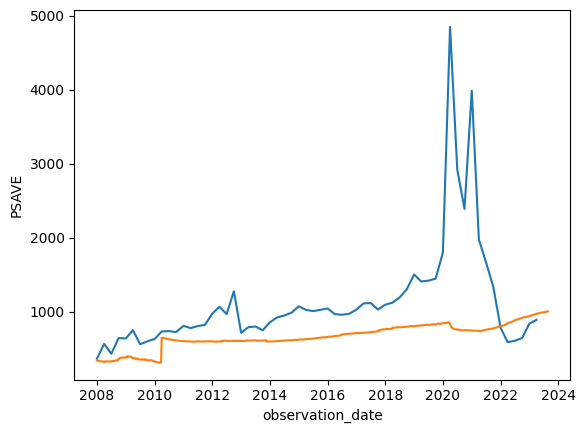

In [4]:
sns.lineplot(data=df_save, x='observation_date', y='PSAVE')
sns.lineplot(data=df_credit, x='observation_date', y='CCLACBW027SBOG',)


## Fit Line and Calculate Excess Savings

In [ ]:
# Fit a line to the savings data from 2008-01-01 through 2020-01-01
mask = (df_save['observation_date'] >= '2008-01-01') & (df_save['observation_date'] <= '2020-01-01')

# Extract the 'observation_date' and 'PSAVE' columns
masked_dates = pd.to_datetime(df_save['observation_date'].loc[mask])
dates = pd.to_datetime(df_save['observation_date'])
# Convert to datetime objects
y = df_save['PSAVE'].loc[mask].values  # Dependent variable (PSAVE)
y_all = df_save['PSAVE'].values  # Dependent variable (PSAVE)

# Convert 'observation_date' to numerical values (you may need to adjust this conversion)
reference_date = pd.Timestamp('1970-01-01')
X_numeric = (masked_dates - reference_date).dt.days
X_numeric_all = (dates - reference_date).dt.days

# Calculate the coefficients of the linear regression manually using NumPy
X_mean = np.mean(X_numeric)
y_mean = np.mean(y)
numerator = np.sum((X_numeric - X_mean) * (y - y_mean))
denominator = np.sum((X_numeric - X_mean) ** 2)
slope = numerator / denominator
intercept = y_mean - slope * X_mean

# Create the predicted values based on the linear model
y_pred = slope * X_numeric_all + intercept
df_save['Fit'] = y_pred

# df_save['Fit_Delta'] = 0
df_save['Fit_Delta'] = ((df_save[df_save['observation_date'] > pd.Timestamp('2020-01-01')]['PSAVE'] - df_save[df_save['observation_date'] > pd.Timestamp('2020-01-01')]['Fit'])/4).cumsum()


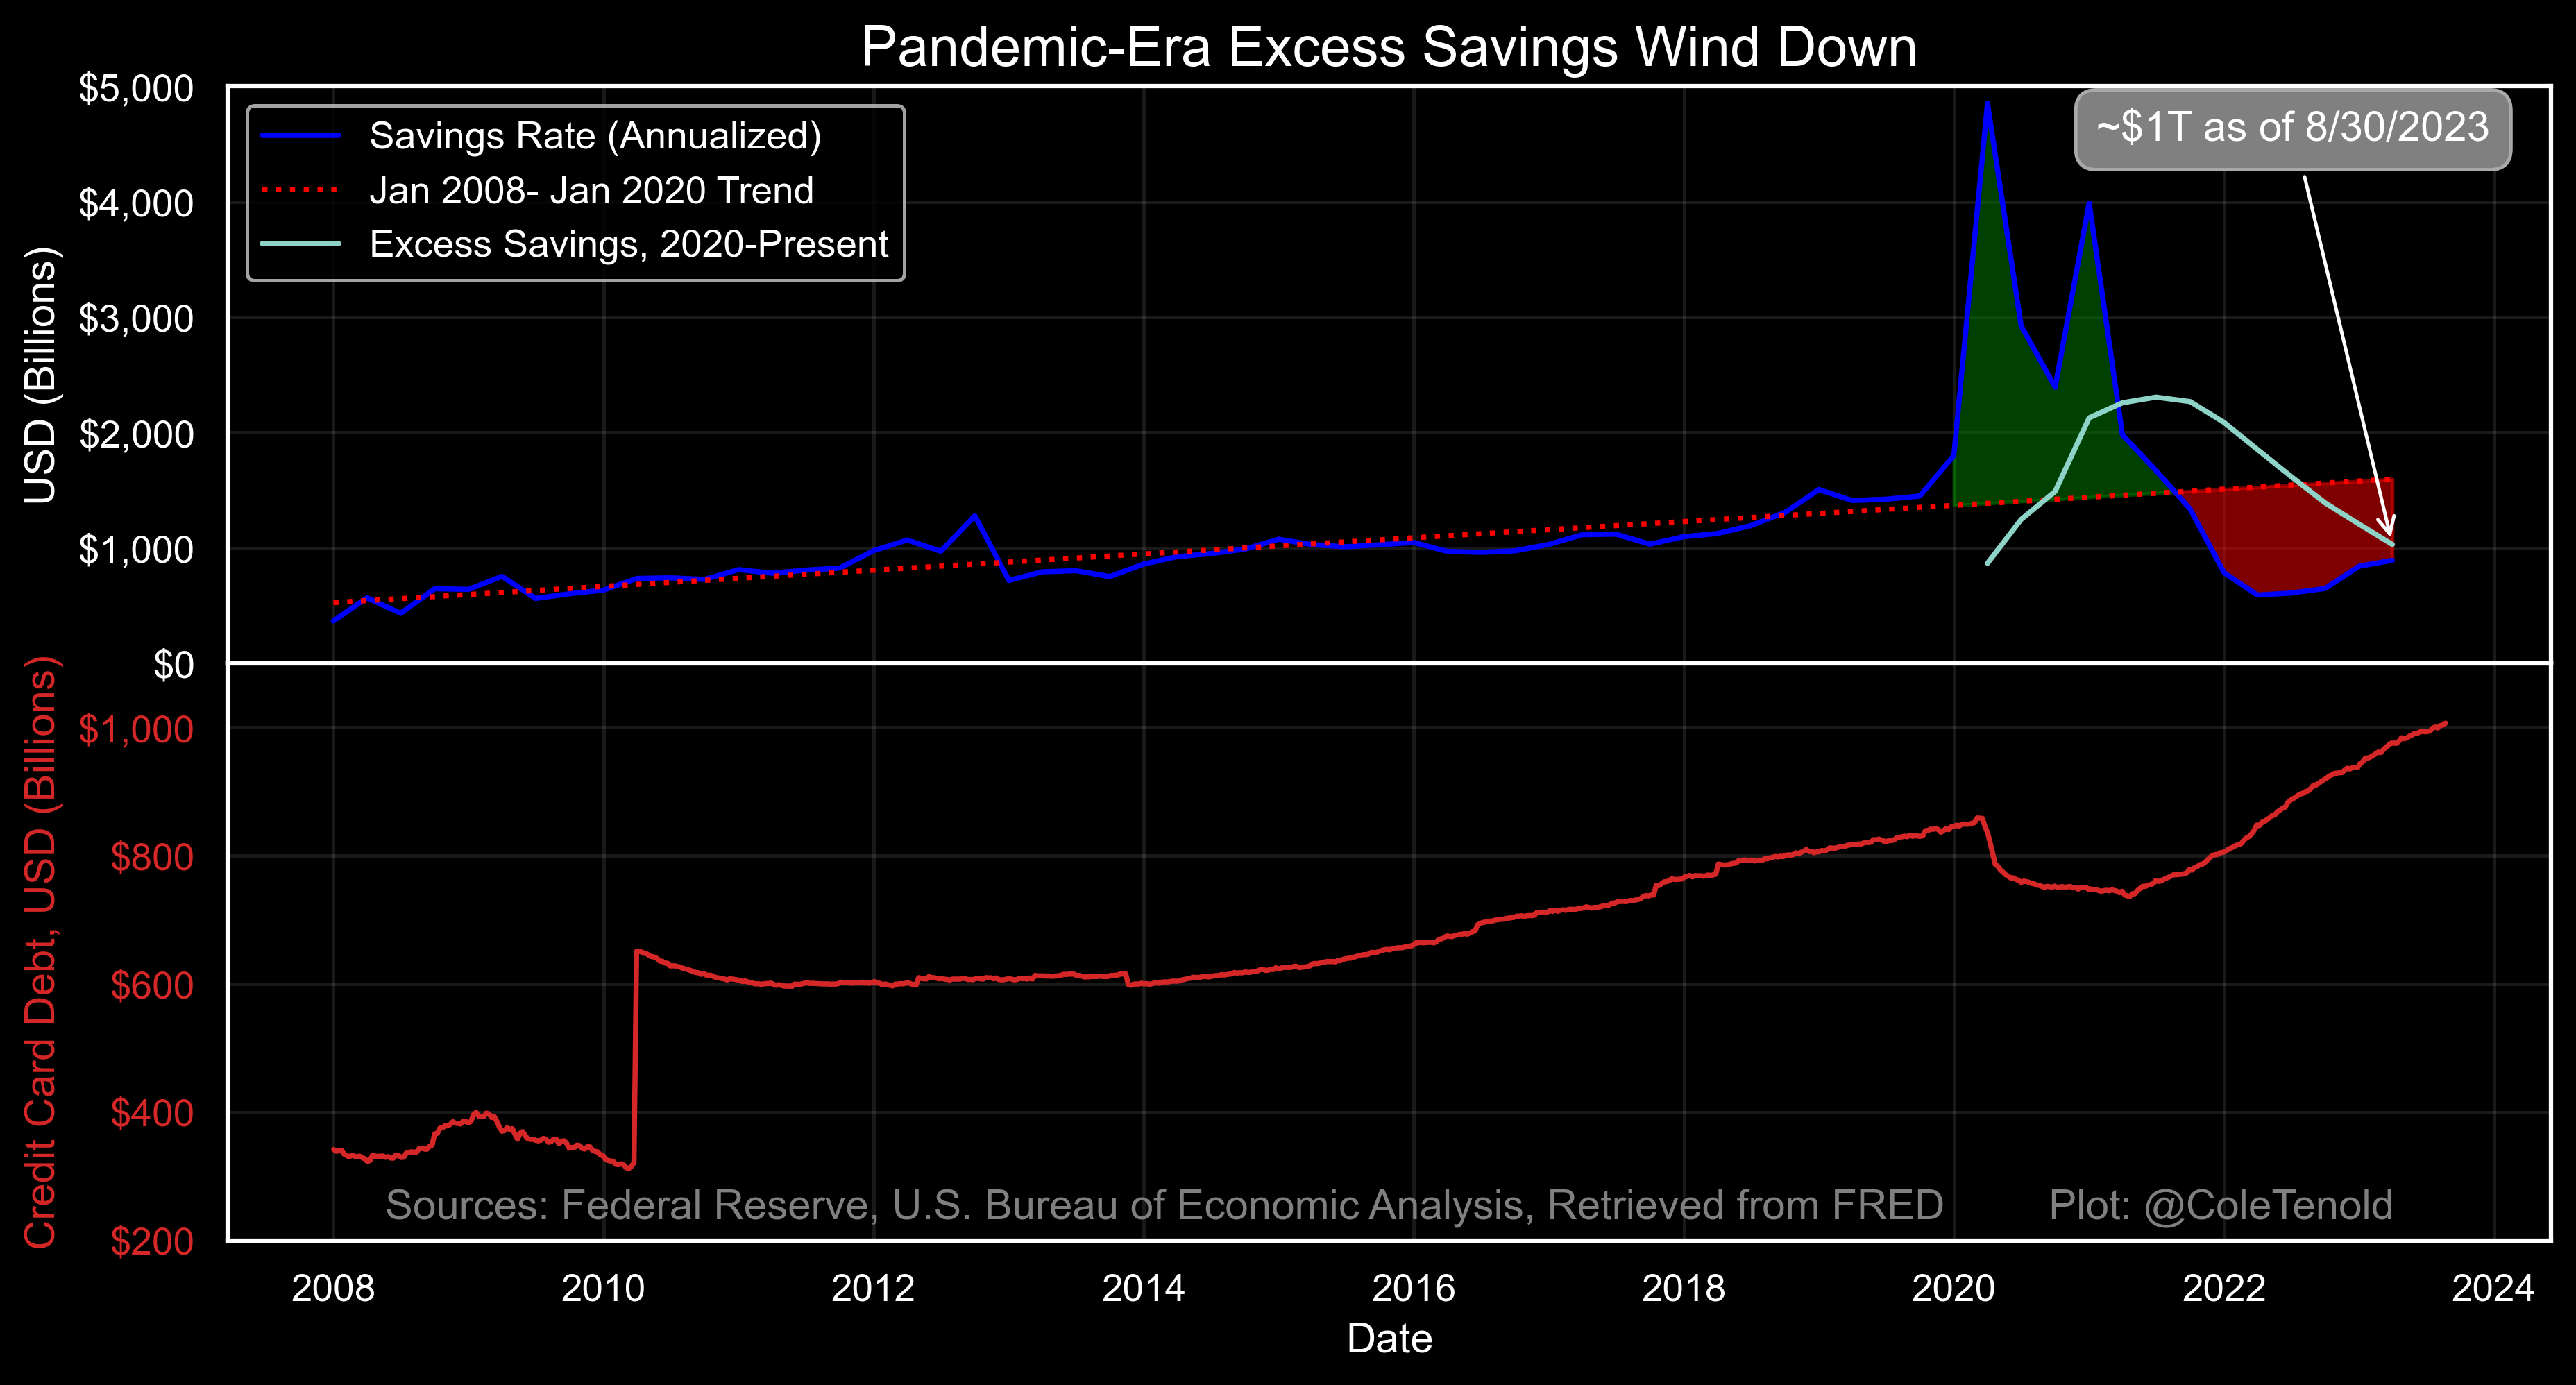

In [11]:
# Setup plots
plt.rcParams['figure.dpi'] = 360
sns.set(style="white")
plt.style.use('dark_background')
fig, ax = plt.subplots(2,1,figsize=(12,6), sharex=True)
ax[0].grid(color='gray', linestyle='-', linewidth=1, alpha=.2)
ax[1].grid(color='gray', linestyle='-', linewidth=1, alpha=.2)
ax[0].set_xlabel('Date')
ax[0].set_ylabel('USD (Billions)')

# Create a scatter plot of the actual data points
ax[0].plot(X_numeric_all, y_all, label='Savings Rate (Annualized)', color='blue')

# Plot the linear regression line
ax[0].plot(X_numeric_all, y_pred, label='Jan 2008- Jan 2020 Trend', color='red', linestyle=':')

start_date = pd.Timestamp('2020-01-01') #Start Accumulation fill from here

ax[0].fill_between(dates[dates >= start_date], y_all[dates >= start_date], y_pred[dates >= start_date],
                 where=(y_all[dates >= start_date] > y_pred[dates >= start_date]), interpolate=True, color='green', alpha=0.5)
ax[0].fill_between(dates[dates >= start_date], y_all[dates >= start_date], y_pred[dates >= start_date],
                 where=(y_all[dates >= start_date] < y_pred[dates >= start_date]), interpolate=True, color='red', alpha=0.5)

# Add labels and legend
plt.xlabel('Date')
ax[0].plot(X_numeric_all, df_save['Fit_Delta'], label='Excess Savings, 2020-Present')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax[0].yaxis.set_major_formatter(tick) 
ax[1].yaxis.set_major_formatter(tick) 
ax[0].set_ylim(0,5000)
ax[0].set_title('Pandemic-Era Excess Savings Wind Down', fontsize=16)

ax[1].set_ylabel('Credit Card Debt, USD (Billions)', color='tab:red')  # we already handled the x-label with ax1
ax[1].plot(df_credit['observation_date'], df_credit['CCLACBW027SBOG'], color='tab:red')
ax[1].tick_params(axis='y', labelcolor='tab:red')
ax[1].set_ylim(200, 1100)


plt.subplots_adjust(hspace=.0)
ax[0].legend()

source = "Sources: Federal Reserve, U.S. Bureau of Economic Analysis, Retrieved from FRED         Plot: @ColeTenold"
ax[1].text((ax[1].get_xlim()[0]+ax[1].get_xlim()[1])/2, ax[1].get_ylim()[0]+20, source, ha='center', va='bottom', fontsize=12, color='gray')
ax[0].annotate('~$1T as of 8/30/2023',
             xy=(X_numeric_all.iloc[-1], df_save['Fit_Delta'].iloc[-1]),  # Point to annotate
             xytext=(X_numeric_all.iloc[-1]-800, df_save['Fit_Delta'].iloc[-1] + 3500),  # Position of the text
             arrowprops=dict(arrowstyle='->'),  # Arrow style
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='darkgray', facecolor='gray'),  # Text box style
             fontsize=12,  # Font size of the text
             color='white'  # Text color
             )

plt.show()

In [6]:
df_save['Fit_Delta'].iloc[-1]

1029.6567956686506